In [1]:
import pandas as pd

In [2]:
y = []
for x in ['siramcerah.csv','mengeringcerah.csv','sirammendung.csv','mengeringmendung.csv']:
    y.append(pd.read_csv(x))
df = pd.concat(y)

In [3]:
df.describe()

,Unnamed: 0,humidity,temperature,ambient humidity,ambient temperature,light
count,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000
mean,3517.681818,66.277374,36.657838,56.468687,33.152245,29564.748485
std,2524.964530,20.214678,2.771227,3.280824,1.034301,14093.898445
min,0.000000,39.000000,30.191960,46.000000,29.000000,16615.000000
25%,1237.000000,47.000000,34.425235,55.000000,32.990000,16668.000000
50%,3149.500000,66.000000,36.984360,56.000000,33.000000,16789.500000
75%,5624.250000,85.000000,39.268665,57.000000,33.993900,45000.000000
max,8999.000000,98.000000,40.852740,67.000000,34.000000,45066.000000


In [10]:
df['humidity'].describe()['min']

39.0

In [4]:
!pip install scikit-fuzzy

     ---------------------------------------- 0.0/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     - ----------------------------------- 41.0/994.0 kB 195.7 kB/s eta 0:00:05
     --- --------------------------------- 81.9/994.0 kB 327.3 kB/s eta 0:00:03
     --- -------------------------------- 102.4/994.0 kB 392.2 kB/s eta 0:00:03
     ------ ----------------------------- 184.3/994.0 kB 556.2 kB/s eta 0:00:02
     ------- ---------------------------- 204.8/994.0 kB 565.6 kB/s eta 0:00:02
     --------- -------------------------- 266.2/994.0 kB 654.7 kB/s eta 0:00:02
     --------- -------------------------- 266.2/994.0 kB 654.7 kB/s eta 0:00:02
     ------------- ---------------------- 368.6/994.0 kB 764.2 kB/s eta 0:00:01
     -------------- --------------------- 409.6/994.0 kB 730.1 kB

In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [16]:
rendah = fuzz.trimf(df['humidity'].values,
                    [df['humidity'].describe()['min'],
                     df['humidity'].describe()['min'],
                     df['humidity'].describe()['25%']])
tengah = fuzz.trimf(df['humidity'].values,
                    [df['humidity'].describe()['25%'],
                     df['humidity'].describe()['50%'],
                     df['humidity'].describe()['75%']])
tinggi = fuzz.trimf(df['humidity'].values,
                    [df['humidity'].describe()['75%'],
                     df['humidity'].describe()['max'],
                     df['humidity'].describe()['max']])
print(rendah)
print(tengah)
print(tinggi)

[0.875 0.875 0.875 ... 1.    1.    1.   ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


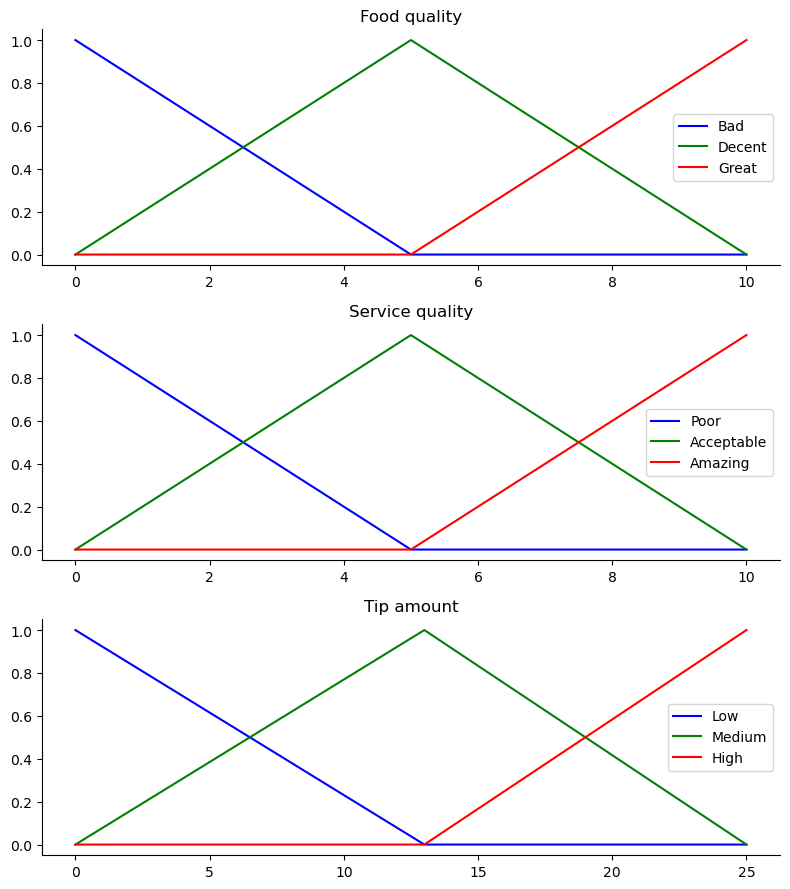

In [17]:
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip = np.arange(0, 26, 1)

# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [25]:
yd =[]
for xd in y:
    yd.append(xd[['humidity','temperature',
                'ambient humidity','ambient temperature',
                  'light']].diff().fillna(0))
dfdiff = pd.concat(yd)

In [26]:
dfdiff.describe()

,humidity,temperature,ambient humidity,ambient temperature,light
count,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000
mean,-0.000253,0.000683,0.001717,-0.000101,-0.010909
std,0.107546,0.001567,0.129871,0.004773,0.954430
min,-1.000000,-0.010000,-2.000000,-0.010000,-2.000000
25%,0.000000,0.000780,0.000000,-0.001960,-1.000000
50%,0.000000,0.001080,0.000000,0.002200,0.000000
75%,0.000000,0.001520,0.000000,0.003600,1.000000
max,1.000000,0.010000,1.000000,0.010000,2.000000


In [11]:
print(df.columns)

Index(['Unnamed: 0', 'date', 'humidity', 'temperature', 'ambient humidity',
       'ambient temperature', 'light', 'status'],
      dtype='object')


In [12]:
data = df[['humidity', 'temperature', 'ambient humidity',
       'ambient temperature', 'light']].to_numpy()

In [13]:
label = df['status'].to_numpy()

In [14]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data, label, test_size=0.10, random_state=42)

In [15]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(train_x,train_y)

SVC()

In [16]:
pred_y = clf.predict(test_x)
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y,pred_y)
print(score)

0.8333333333333334


In [27]:
datad = dfdiff[['humidity', 'temperature', 'ambient humidity',
       'ambient temperature', 'light']].to_numpy()

In [28]:
labeld = df['status'].to_numpy()

In [29]:
train_x, test_x, train_y, test_y = train_test_split(datad, labeld, test_size=0.10, random_state=42)

In [30]:
clf = svm.SVC(gamma='scale')
clf.fit(train_x,train_y)

SVC()

In [31]:
pred_y = clf.predict(test_x)
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y,pred_y)
print(score)

0.9126262626262627
